In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
import pandas as pd
import numpy as np

In [4]:
import math

In [5]:
df_raw = pd.read_csv("C:/Users/sevda sezer/fish/Fish.csv")

In [6]:
df_raw.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
df_raw.drop(index=40,inplace = True)

In [8]:
df_raw.Height = df_raw.Height.astype('int64')

In [9]:
df_raw.Width = df_raw.Width.astype('int64')

In [10]:
df_raw

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11,4
1,Bream,290.0,24.0,26.3,31.2,12,4
2,Bream,340.0,23.9,26.5,31.1,12,4
3,Bream,363.0,26.3,29.0,33.5,12,4
4,Bream,430.0,26.5,29.0,34.0,12,5
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2,1
155,Smelt,13.4,11.7,12.4,13.5,2,1
156,Smelt,12.2,12.1,13.0,13.8,2,1
157,Smelt,19.7,13.2,14.3,15.2,2,2


In [11]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [12]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Species,158,7,Perch,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,158,NaN,NaN,NaN,400.847,357.698,5.9,121.25,281.5,650,1650
Length1,158,NaN,NaN,NaN,26.293,10.0114,7.5,19.15,25.3,32.7,59
Length2,158,NaN,NaN,NaN,28.4658,10.7317,8.4,21,27.4,35.75,63.4
Length3,158,NaN,NaN,NaN,31.2804,11.6276,8.8,23.2,29.7,39.675,68
Height,158,NaN,NaN,NaN,8.47468,4.28254,1,5,7,12,18
Width,158,NaN,NaN,NaN,3.97468,1.69657,1,3,4,5,8


In [13]:
df_raw["Weight"] = np.log(df_raw.Weight)

In [14]:
df_raw["Weight"]

0      5.488938
1      5.669881
2      5.828946
3      5.894403
4      6.063785
         ...   
154    2.501436
155    2.595255
156    2.501436
157    2.980619
158    2.990720
Name: Weight, Length: 158, dtype: float64

In [15]:
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [16]:
df_compare = df_raw.copy()

In [17]:
df_raw.items()

<generator object DataFrame.items at 0x00000199EB2E8F20>

In [18]:
a = df_raw.items()

In [19]:
next(a)

('Species',
 0      Bream
 1      Bream
 2      Bream
 3      Bream
 4      Bream
        ...  
 154    Smelt
 155    Smelt
 156    Smelt
 157    Smelt
 158    Smelt
 Name: Species, Length: 158, dtype: object)

In [20]:
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c):
            df[n] = c.astype("category").cat.as_ordered()

In [21]:
def apply_cats(df, train):
    for n, c in df.items():
        if train[n].dtype == "category":
            df[n] = pd.Categorical(c, categories = train[n].cat.categories, ordered = True)

In [54]:
df = df_raw.copy()

In [55]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,5.488938,23.2,25.4,30.0,11,4
1,Bream,5.669881,24.0,26.3,31.2,12,4
2,Bream,5.828946,23.9,26.5,31.1,12,4
3,Bream,5.894403,26.3,29.0,33.5,12,4
4,Bream,6.063785,26.5,29.0,34.0,12,5


In [56]:
train_cats(df)

In [57]:
train_cats(df_compare)

In [58]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,5.488938,23.2,25.4,30.0,11,4
1,Bream,5.669881,24.0,26.3,31.2,12,4
2,Bream,5.828946,23.9,26.5,31.1,12,4
3,Bream,5.894403,26.3,29.0,33.5,12,4
4,Bream,6.063785,26.5,29.0,34.0,12,5


In [27]:
df["Species"]

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 158, dtype: category
Categories (7, object): ['Bream' < 'Parkki' < 'Perch' < 'Pike' < 'Roach' < 'Smelt' < 'Whitefish']

In [28]:
df["Species"].cat.categories

Index(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'], dtype='object')

In [29]:
df["Species"].cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Length: 158, dtype: int8

In [28]:
import os

In [29]:
os.makedirs('tmp', exist_ok=True) # Don't give error if file is already there 
df.to_feather('tmp/fis_1')

ImportError: Missing optional dependency 'pyarrow'.  Use pip or conda to install pyarrow.

In [30]:
display_all(df.isnull().sum().sort_index()/len(df))

Height     0.0
Length1    0.0
Length2    0.0
Length3    0.0
Species    0.0
Weight     0.0
Width      0.0
dtype: float64

In [31]:
pd.isnull(df["Species"])

0      False
1      False
2      False
3      False
4      False
       ...  
154    False
155    False
156    False
157    False
158    False
Name: Species, Length: 158, dtype: bool

In [32]:
pd.isnull(df["Species"]).sum()

0

In [33]:
def fix_missing(df, col, name):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum:
            df[name+"_na"] = pd.isnull(col)
        df[name] = col.fillna(col.median())

In [34]:
def numericalize(df, col, name):
    if not is_numeric_dtype(col):
        df[name] = col.cat.codes+1

In [35]:
def proc_df(df, y_fld):
    
    y = df[y_fld].values
    df.drop([y_fld], axis = 1, inplace = True)
    
    for n, c in df.items():
        fix_missing(df, c, n)
        
    for n, c in df.items():
        numericalize(df, c, n)
    
    res = [df, y]
    

    
    return res

In [36]:
df, y = proc_df(df, 'Weight')

In [37]:
df_compare, y_compare = proc_df(df_compare, 'Weight')

In [38]:
df.columns

Index(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Length1_na', 'Length2_na', 'Length3_na', 'Height_na', 'Width_na'],
      dtype='object')

In [39]:
y

array([5.48893773, 5.66988092, 5.82894562, 5.89440283, 6.06378521,
       6.10924758, 6.2146081 , 5.96614674, 6.10924758, 6.2146081 ,
       6.1633148 , 6.2146081 , 6.2146081 , 5.82894562, 6.39692966,
       6.39692966, 6.55108034, 6.55108034, 6.41345896, 6.47697236,
       6.35437004, 6.52941884, 6.42971948, 6.5220928 , 6.55108034,
       6.58617165, 6.57925121, 6.57088296, 6.74523635, 6.90775528,
       6.82437367, 6.86171134, 6.82979374, 6.88243747, 6.85646198,
       3.68887945, 4.2341065 , 4.35670883, 4.46590812, 4.78749174,
       4.70048037, 4.78749174, 5.01063529, 4.97673374, 5.07517382,
       4.94164242, 5.07517382, 5.12989871, 5.08140436, 5.29831737,
       5.19295685, 5.66988092, 5.60580207, 5.96614674, 5.59842196,
       5.59842196, 5.7235851 , 6.29156914, 6.68461173, 6.90775528,
       4.00733319, 4.09434456, 4.49980967, 4.78749174, 5.01063529,
       4.94164242, 5.13579844, 4.97673374, 5.29831737, 5.6094718 ,
       5.70378247, 1.77495235, 3.4657359 , 3.68887945, 3.94158

In [40]:
display_all(df.tail().T)

,154,155,156,157,158
Species,6,6,6,6,6
Length1,11.5,11.7,12.1,13.2,13.8
Length2,12.2,12.4,13,14.3,15
Length3,13.4,13.5,13.8,15.2,16.2
Height,2,2,2,2,2
Width,1,1,1,2,1
Length1_na,False,False,False,False,False
Length2_na,False,False,False,False,False
Length3_na,False,False,False,False,False
Height_na,False,False,False,False,False


In [41]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9980444017282587

In [42]:
def split_train_val(df,n): 
    
    return df[:n].copy(), df[n:].copy()

In [43]:
n_valid = 50  # same as Kaggle's test set size
n_train = len(df)-n_valid
X_train, X_valid = split_train_val(df_compare, n_train)
y_train, y_valid = split_train_val(y_compare, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((108, 11), (108,), (50, 11), (50,))

In [44]:
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

In [45]:
def print_score(m):
    
    print(f"RMSE of train set {rmse(m.predict(X_train), y_train)}")
    print(f"RMSE of validation set {rmse(m.predict(X_valid), y_valid)}")
    print(f"R^2 of train set {m.score(X_train, y_train)}")
    print(f"R^2 of validation set {m.score(X_valid, y_valid)}")

In [46]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 247 ms
RMSE of train set 0.07489654766666089
RMSE of validation set 0.512480490171576
R^2 of train set 0.9932008428884996
R^2 of validation set 0.9297456683100471


In [47]:
n_valid = 50  # same as Kaggle's test set size
n_train = len(df)-n_valid
X_train, X_valid = split_train_val(df, n_train)
y_train, y_valid = split_train_val(y, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((108, 11), (108,), (50, 11), (50,))

In [48]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 256 ms
RMSE of train set 0.08311732576847666
RMSE of validation set 0.5268050928038056
R^2 of train set 0.9916263539180488
R^2 of validation set 0.9257633504681752


In [59]:
from sklearn import tree
import matplotlib.pyplot as plt

In [60]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
t = m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.1639899649184867
RMSE of validation set 0.5547895311403506
R^2 of train set 0.9674038713131703
R^2 of validation set 0.9176668089331874


In [61]:
estimator = m.estimators_[0]

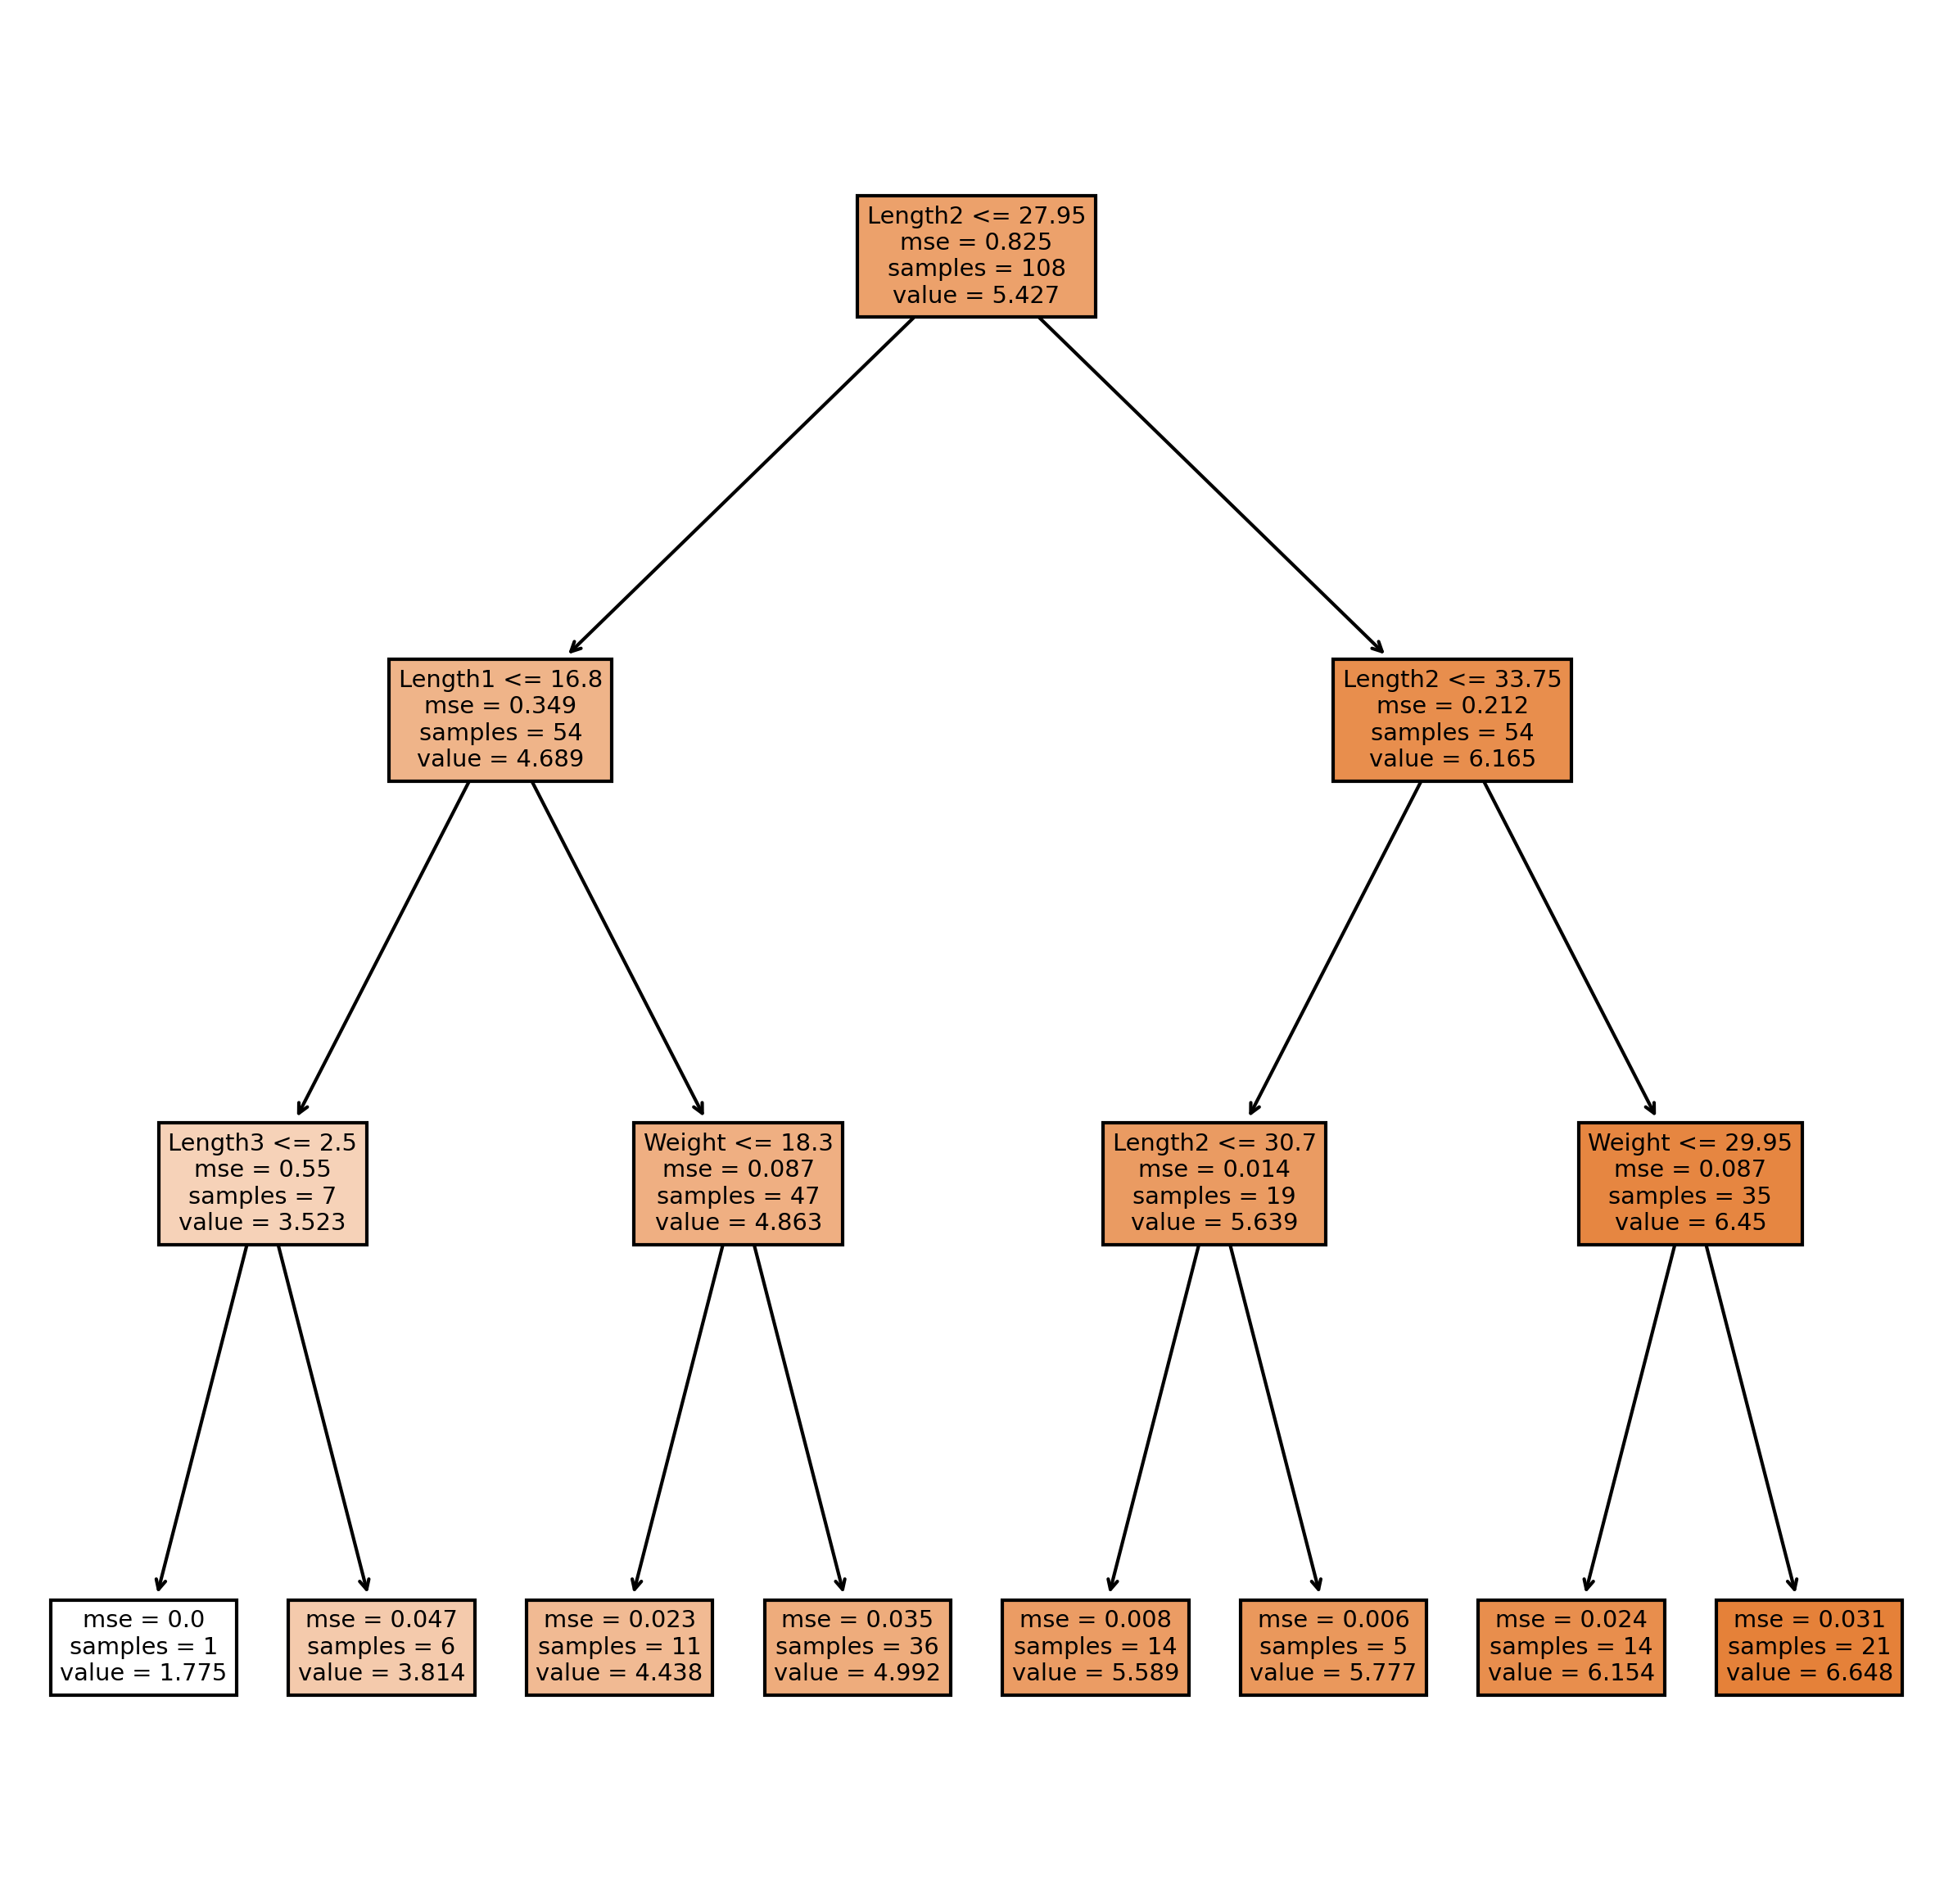

In [62]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(estimator, feature_names=df.columns,filled=True);

In [63]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.017878276160532478
RMSE of validation set 0.6105281014696519
R^2 of train set 0.9996125793543151
R^2 of validation set 0.9002920584549634
